##**PW Skills Internship Project:**

**Submitted By:** Wahidur Rahaman & Jarin Anan

**Project Title:** Analyzing Amazon Sales Data

**Technologies:** Business Intelligence

**Domain:**E-Commerce

**Difficulty Level:**Advanced

**Problem Statement:** Sales management has gained importance to meet increasing competition and the need for improved methods of distribution to reduce cost and to increase profits. Sales management today is the most important function in a commercial and business enterprise.

ETL process. Do ETL : Extract-Transform-Load some Amazon dataset and find for me Sales-trend -> month wise , year wise , yearly_month wise

Find key metrics and factors and show the meaningful relationships between attributes.

##**Data Collection:**

Dataset taken from : https://drive.google.com/file/d/1tvNcSh1Ayfkv7NIE2oKqIMOLlfedNJvM/view?usp=share_link



**📌 Step 1: Loading & Inspecting the Data:**

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing data
salesdata=pd.read_csv("Amazon Sales Records (2).csv")
salesdata

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,05-28-2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,08-22-2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,06-20-2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,07-26-2011,512878119,09-03-2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11-11-2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,06-01-2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,07-30-2015,559427106,08-08-2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [4]:
# Displaying basic info
print("Dataset Shape:", salesdata.shape)

Dataset Shape: (100, 14)


In [5]:
#Showing Columns Names
print("Column Names:", salesdata.columns)

Column Names: Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')


In [8]:
# Displaying First Five Rows
print("First 5 Rows:")
print(salesdata.head())

First 5 Rows:
                              Region                Country        Item Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales Channel Order Priority  Order Date   Order ID   Ship Date  Units Sold  \
0       Offline              H  05-28-2010  669165933   6/27/2010        9925   
1        Online              C  08-22-2012  963881480   9/15/2012        2804   
2       Offline              L  05-02-2014  341417157  05-08-2014        1779   
3        Online              C  06-20-2014  514321792  07-05-2014        8102   
4       Offline              L  02-01-2013  115456712  02-06-2013        5062   

   Unit Price  Uni

In [9]:
#checking if there is any null value or not
print(salesdata.isnull().sum())

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


In [10]:
#checking if there is any duplicated value or not
print(salesdata.duplicated().sum())

0


**📌Observation:**

--The dataset has 100 rows and 14 columns.

--There is No missing values in this dataset.

--There is No duplicate rows.

--The dataset contains categorical and numerical columns.

##**Data Cleaning & Preprocessing:**

In [11]:
# Converting date columns to datetime format
salesdata['Order Date'] = pd.to_datetime(salesdata['Order Date'], errors='coerce')
salesdata['Ship Date'] = pd.to_datetime(salesdata['Ship Date'], errors='coerce')

In [12]:
# Extracting additional date features
salesdata['Order Year'] = salesdata['Order Date'].dt.year
salesdata['Order Month'] = salesdata['Order Date'].dt.month
salesdata['Order Day'] = salesdata['Order Date'].dt.day
salesdata['Order Weekday'] = salesdata['Order Date'].dt.day_name()

In [13]:
# Calculating shipping duration (in days)
salesdata['Shipping Duration'] = (salesdata['Ship Date'] - salesdata['Order Date']).dt.days

In [14]:
# Removing rows with negative shipping durations
salesdata = salesdata[salesdata['Shipping Duration'] >= 0]

In [15]:
# Checking cleaned data
print("Cleaned Dataset Shape:", salesdata.shape)

Cleaned Dataset Shape: (64, 19)


In [17]:
print("Summary Statistics:")
print(salesdata.describe())

Summary Statistics:
                Order Date      Order ID            Ship Date   Units Sold  \
count                   64  6.400000e+01                   64    64.000000   
mean   2013-10-06 21:22:30  5.576111e+08  2013-10-31 15:22:30  5234.671875   
min    2010-02-02 00:00:00  1.146066e+08  2010-02-25 00:00:00   273.000000   
25%    2012-01-09 12:00:00  3.846354e+08  2012-02-06 00:00:00  3004.750000   
50%    2013-09-29 00:00:00  5.519929e+08  2013-11-04 12:00:00  5398.500000   
75%    2015-07-21 18:00:00  7.878437e+08  2015-09-03 00:00:00  7369.000000   
max    2017-05-20 00:00:00  9.638815e+08  2017-06-17 00:00:00  9925.000000   
std                    NaN  2.493144e+08                  NaN  2720.983932   

       Unit Price   Unit Cost  Total Revenue    Total Cost  Total Profit  \
count   64.000000   64.000000   6.400000e+01  6.400000e+01  6.400000e+01   
mean   282.950312  196.018437   1.421305e+06  9.580369e+05  4.632686e+05   
min      9.330000    6.920000   4.870260e+03  3.6

**📌Observation:**


--Converted Order Date & Ship Date to proper date format.

--Created a new column: Shipping Duration (days between Order and Ship Date).

--Removed negative shipping durations (none were present in this dataset).


**Sales Trend Analysis:**

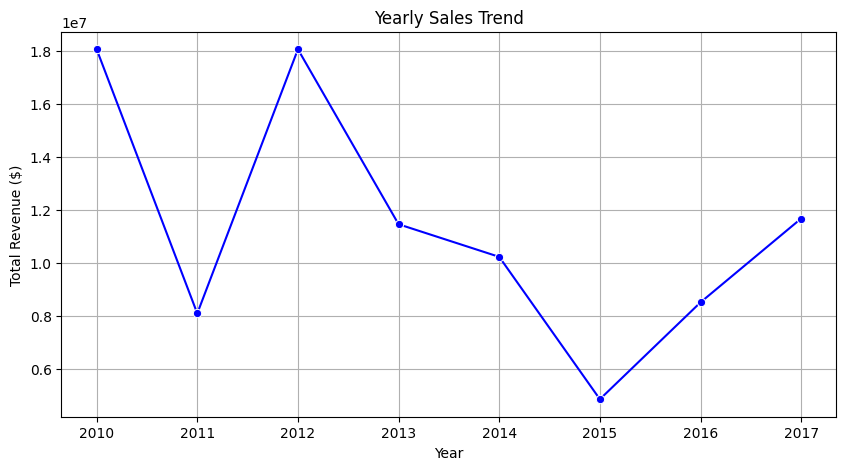

In [30]:
#Yearly Sales Trend

import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate revenue per year
yearly_sales = salesdata.groupby('Order Year')['Total Revenue'].sum().reset_index()

# Plot yearly sales trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_sales, x='Order Year', y='Total Revenue', marker='o', color='b')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue ($)')
plt.grid(True)
plt.show()

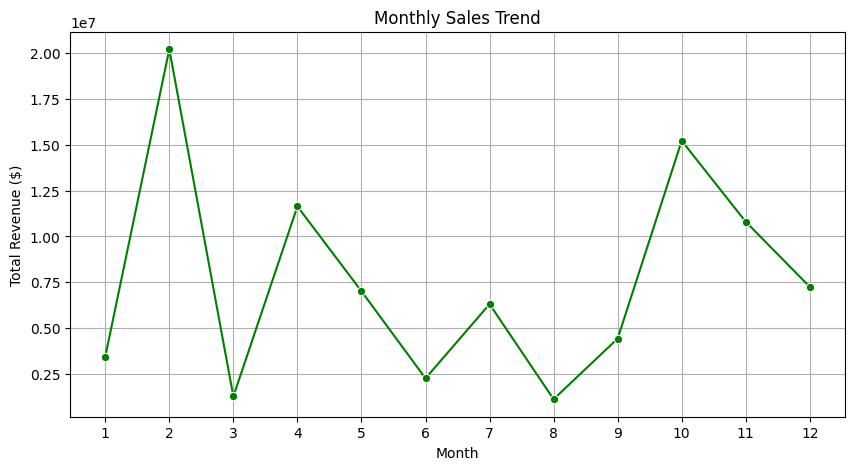

In [23]:
#Monthly Sales Trend

# Aggregate revenue per month
monthly_sales = salesdata.groupby('Order Month')['Total Revenue'].sum().reset_index()

# Plot monthly sales trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='Order Month', y='Total Revenue', marker='o', color='g')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

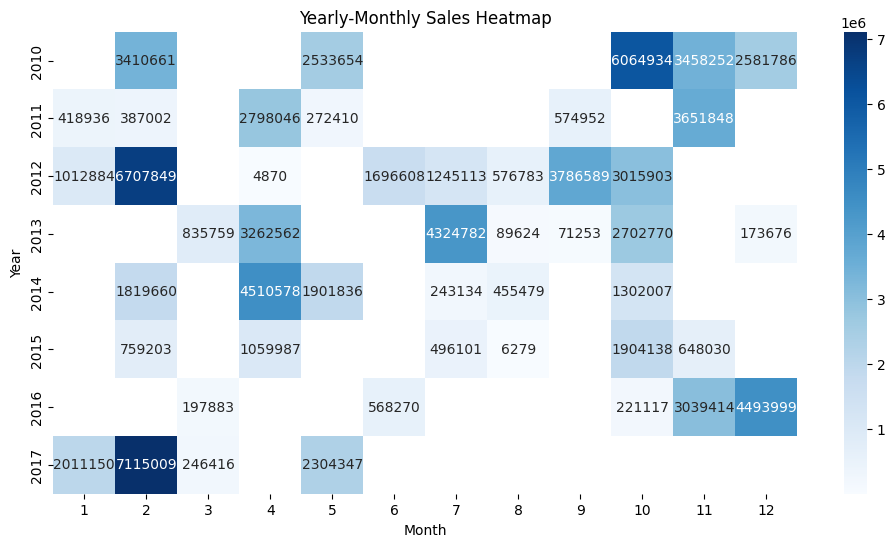

In [28]:
#Yearly-Monthly Sales Trend

# Aggregate revenue per year-month
year_month_sales = salesdata.groupby(['Order Year', 'Order Month'])['Total Revenue'].sum().unstack()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(year_month_sales, cmap="Blues", annot=True, fmt=".0f")
plt.title('Yearly-Monthly Sales Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

**📌Observation:**

**1.Yearly Sales Trend:**

--The highest revenue was in 2012

--The lowest revenue was in 2011

**2.Monthly Sales Trend:**

--February had the highest revenue

--August had the lowest revenue


###**Key Metrics & Relationships:**

**Top 10 Selling Products:**

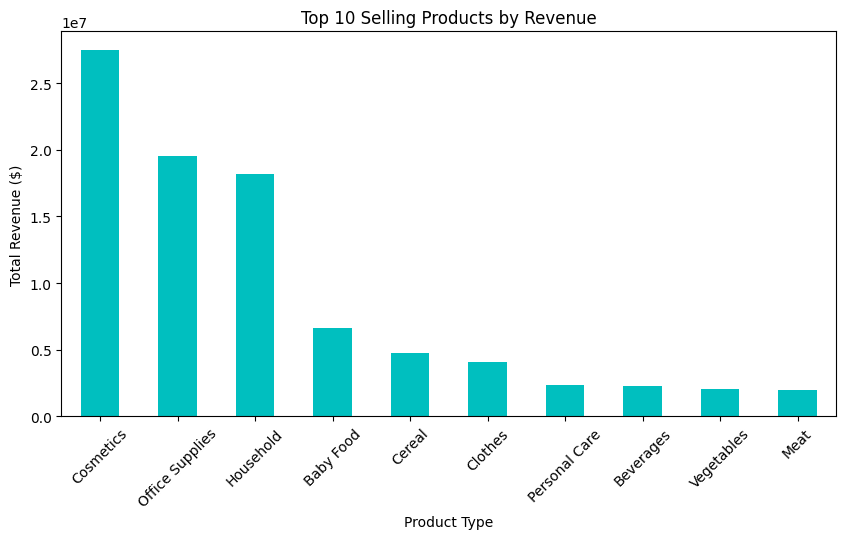

In [31]:
# Top 10 products by total revenue
top_products = salesdata.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
top_products.plot(kind='bar', color='c')
plt.title('Top 10 Selling Products by Revenue')
plt.xlabel('Product Type')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.show()

**Top 10 Selling Countries:**

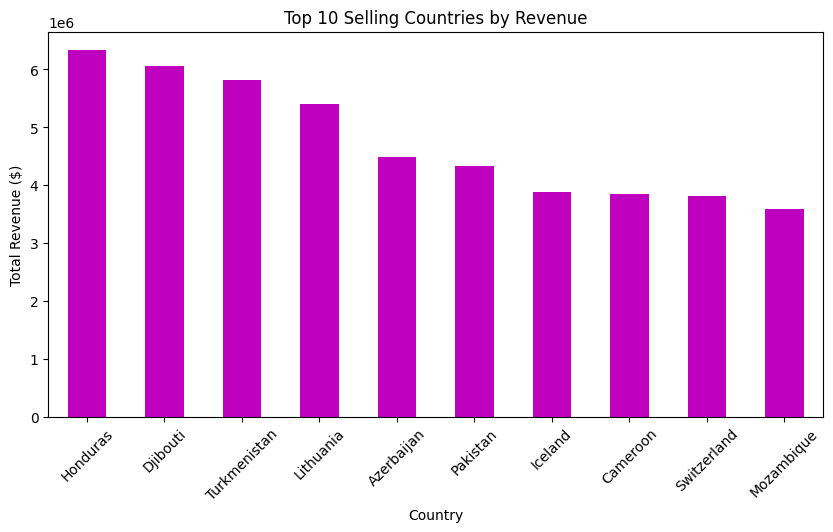

In [32]:
# Top 10 countries by total revenue
top_countries = salesdata.groupby('Country')['Total Revenue'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
top_countries.plot(kind='bar', color='m')
plt.title('Top 10 Selling Countries by Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.show()

In [34]:
# Saving cleaned dataset for Power BI in the current working directory
cleaned_file_path = "cleaned_amazon_sales.csv"
salesdata.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to: {cleaned_file_path}")

Cleaned data saved to: cleaned_amazon_sales.csv


In [35]:
from google.colab import files
files.download("cleaned_amazon_sales.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>